In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from tensorflow.contrib.tensorboard.plugins import projector



print(tf.__version__)

1.14.0


In [48]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [49]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
print('The Classes of images are\n',class_names)

The Classes of images are
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### Exploring the data  : Training Set


In [51]:
train_images.shape

(60000, 28, 28)

In [52]:
len(train_labels)

60000

In [53]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [54]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [55]:
digit_train, counts_train = np.unique(train_labels, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


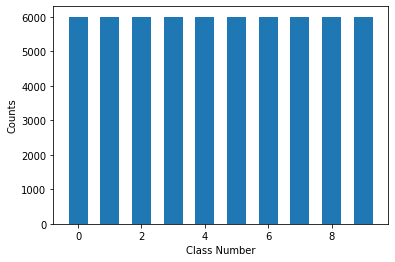

In [56]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Class Number')
plt.ylabel('Counts')
plt.show()

#### Test Set

In [57]:
test_images.shape

(10000, 28, 28)

In [58]:
len(test_labels)

10000

In [59]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [60]:
digit_test, counts_test = np.unique(test_labels, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


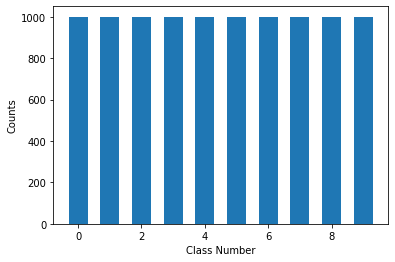

In [61]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Class Number')
plt.ylabel('Counts')
plt.show()

### Preprocess the Data

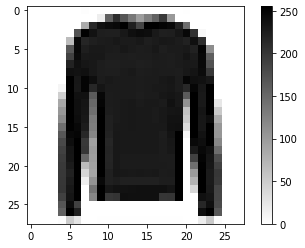

In [62]:
plt.figure()
plt.imshow(train_images[15000], cmap = plt.cm.binary , interpolation = 'nearest')
plt.colorbar()
plt.grid(False)
plt.show()

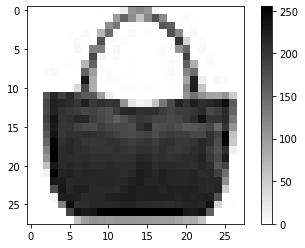

In [63]:
plt.figure()
plt.imshow(train_images[100], cmap = plt.cm.binary , interpolation = 'nearest')
plt.colorbar()
plt.grid(False)
plt.show()

In [64]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255
#normalize the data dimensions so that they are of approximately the same scale
train_images = train_images / 255.0
test_images = test_images / 255.0

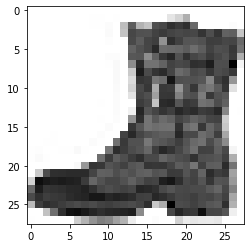

In [65]:
plt.figure()
plt.imshow(train_images[150], cmap=plt.cm.binary)
#plt.colorbar()
plt.grid(False)
plt.show()

#### Visualization of Data

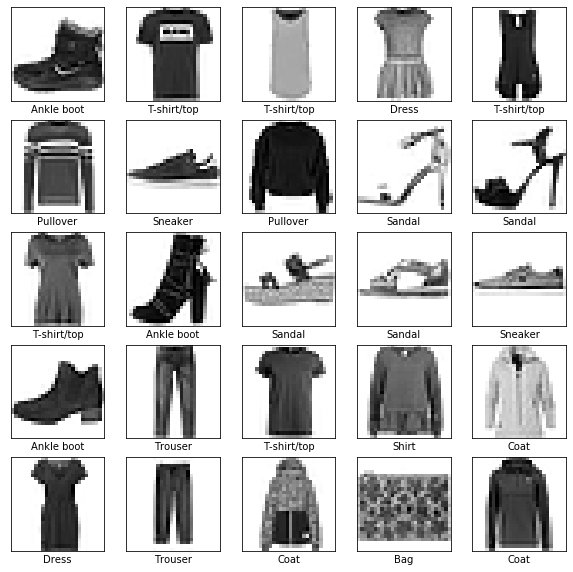

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build The Model

In [67]:
#Model 1
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Take a look at the model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##### Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)



In [69]:
history_1 = model_1.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(test_images, test_labels), verbose=0)
print(history_1)

In [70]:
#%tensorboard --logdir logs

In [115]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=0)
print('Test Accuracy: %.2f' % (test_acc*100))
train_loss, train_acc = model_1.evaluate(train_images,  train_labels, verbose = 2)
print('\nTraining accuracy: %.2f\n ' %(train_acc*100))

Test Accuracy: 88.21
60000/60000 - 3s - loss: 0.1828 - acc: 0.9306

Training accuracy: 93.06
 


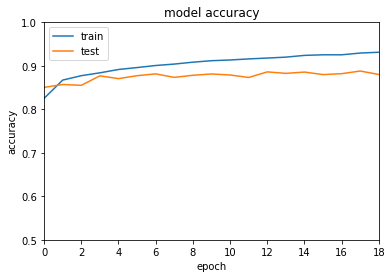

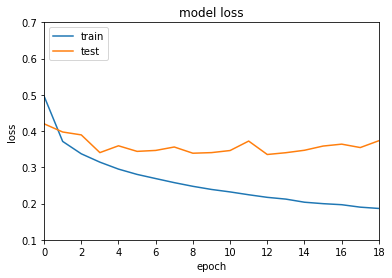

In [72]:
# summarize history for accuracy
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.50,1.00])
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.10,0.70])
plt.show()

In [73]:
y_pred_1 = model_1.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
	print('%d (expected %d)' % (y_pred_1[i], test_labels[i]))
con_mat_1 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_1, num_classes=None)
print('Confusion_matrix: \n',con_mat_1)
report_1 = classification_report(test_labels, y_pred_1)
print('Classification Report: \n', report_1)

9 (expected 9)
2 (expected 2)
1 (expected 1)
1 (expected 1)
6 (expected 6)
1 (expected 1)
4 (expected 4)
6 (expected 6)
5 (expected 5)
7 (expected 7)
Confusion_matrix: 
 Tensor("confusion_matrix_4/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.81      0.78      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.69      0.72      0.71      1000
           7       0.97      0.91      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.90      0.99      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0

In [74]:
#Model 2
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])
# Take a look at the model summary
model_2.summary()

#Compile the model
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_18 (Dense)             (None, 20)                1020      
Total params: 40,270
Trainable params: 40,270
Non-trainable params: 0
_________________________________________________________________


#Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


%tensorboard --logdir logs

In [75]:
history_2 = model_2.fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels), verbose=0)


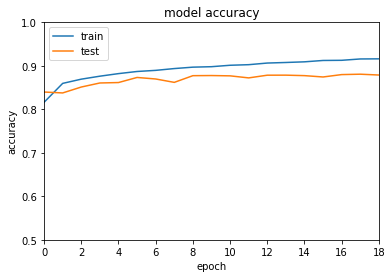

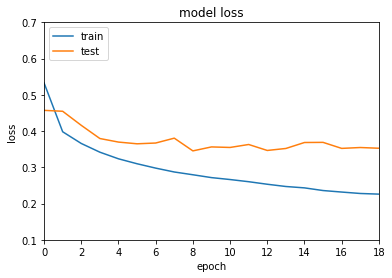

In [76]:
# summarize history for accuracy
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.50,1.00])
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.10,0.70])
plt.show()

In [77]:
y_pred_2 = model_2.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
	print('%d (expected %d)' % (y_pred_2[i], test_labels[i]))
con_mat_2 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_2, num_classes=None)
print('Confusion_matrix: \n',con_mat_2)
report_2 = classification_report(test_labels, y_pred_2)
print('Classification Report: \n', report_2)

9 (expected 9)
2 (expected 2)
1 (expected 1)
1 (expected 1)
6 (expected 6)
1 (expected 1)
4 (expected 4)
6 (expected 6)
5 (expected 5)
7 (expected 7)
Confusion_matrix: 
 Tensor("confusion_matrix_5/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.84      0.79      1000
           3       0.92      0.85      0.88      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.62      0.67      1000
           7       0.92      0.98      0.95      1000
           8       0.95      0.98      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0

In [118]:
#training accuracy
train_loss_2, train_acc_2 = model_2.evaluate(train_images,  train_labels, verbose = 2)
print('\nTraining accuracy: %.2f ' %(train_acc_2*100))
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nAccuracy: %.2f' % (test_acc*100))

60000/60000 - 3s - loss: 0.1691 - acc: 0.9365

Training accuracy: 93.65 
10000/10000 - 1s - loss: 0.4397 - acc: 0.8787

Accuracy: 87.87


In [79]:
#Model 3
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])
# Take a look at the model summary
model_3.summary()

#Compile the model
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_21 (Dense)             (None, 20)                2020      
Total params: 223,370
Trainable params: 223,370
Non-trainable params: 0
_________________________________________________________________


In [80]:
history_3 = model_3.fit(train_images, train_labels, epochs=60, batch_size=32, validation_data=(test_images, test_labels),verbose=0)


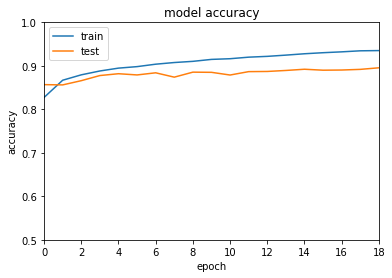

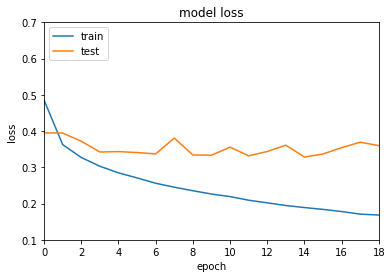

In [81]:
# summarize history for accuracy
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.50,1.00])
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,18,0.10,0.70])
plt.show()

In [82]:
y_pred_3 = model_3.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
	print('%d (expected %d)' % (y_pred_3[i], test_labels[i]))
con_mat_3 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_3, num_classes=None)
print('Confusion_matrix: \n',con_mat_3)
report_3 = classification_report(test_labels, y_pred_3)
print('Classification Report: \n', report_3)

9 (expected 9)
2 (expected 2)
1 (expected 1)
1 (expected 1)
6 (expected 6)
1 (expected 1)
4 (expected 4)
6 (expected 6)
5 (expected 5)
7 (expected 7)
Confusion_matrix: 
 Tensor("confusion_matrix_6/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.91      0.87      0.89      1000
           4       0.80      0.83      0.82      1000
           5       0.97      0.98      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0

In [117]:
#training accuracy
train_loss_3, train_acc_3 = model_3.evaluate(train_images,  train_labels, verbose = 2)
print('\nTraining accuracy: %.2f ' %(train_acc_3*100))
#Test Accuracy
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy: %.2f' % (test_acc*100))
predictions = model_3.predict_classes(test_images)

60000/60000 - 4s - loss: 0.0831 - acc: 0.9674

Training accuracy: 96.74 
10000/10000 - 1s - loss: 0.7050 - acc: 0.8888

Test Accuracy: 88.88


In [84]:
#Model 4
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, activation='linear'),
    keras.layers.Dense(500, activation='linear'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='softmax')
])
model_4.summary()
model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_23 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_24 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               60200     
Total params: 1,496,000
Trainable params: 1,496,000
Non-trainable params: 0
_________________________________________________________________


In [85]:
history_4 = model_4.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), verbose=0)


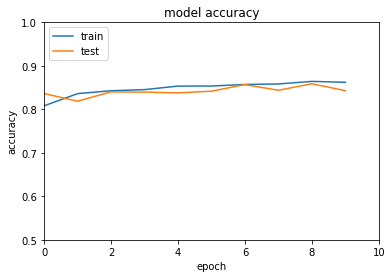

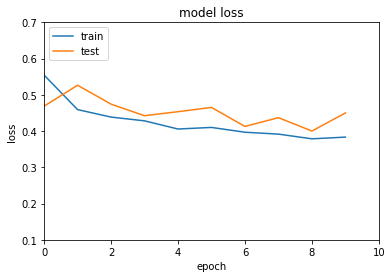

In [86]:
# summarize history for accuracy
plt.plot(history_4.history['acc'])
plt.plot(history_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.50,1.00])
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,0.70])
plt.show()

In [116]:
#training accuracy
train_loss_4, train_acc_4 = model_4.evaluate(train_images,  train_labels, verbose = 2)
print('\nTraining accuracy: %.2f ' %(train_acc_4*100))

#test accuracy
test_loss_4, test_acc_4 = model_4.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy: %.2f' %(test_acc_4*100))

60000/60000 - 9s - loss: 0.3705 - acc: 0.8629

Training accuracy: 86.29 
10000/10000 - 2s - loss: 0.4500 - acc: 0.8428

Test accuracy: 84.28


In [87]:
y_pred_4 = model_4.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
	print('%d (expected %d)' % (y_pred_4[i], test_labels[i]))
con_mat_4 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_4, num_classes=None)
print('Confusion_matrix: \n',con_mat_4)
report_4 = classification_report(test_labels, y_pred_4)
print('Classification Report: \n', report_4)

9 (expected 9)
2 (expected 2)
1 (expected 1)
1 (expected 1)
6 (expected 6)
1 (expected 1)
4 (expected 4)
6 (expected 6)
5 (expected 5)
7 (expected 7)
Confusion_matrix: 
 Tensor("confusion_matrix_7/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.74      0.73      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.78      0.66      0.72      1000
           5       0.92      0.95      0.93      1000
           6       0.58      0.64      0.61      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0

In [88]:
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_28 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 81,620
Trainable params: 81,620
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history_5 = model_5.fit(train_images, train_labels, validation_data=(test_images, test_labels),epochs=10, verbose =0)

In [91]:
#training accuracy
train_loss_5, train_acc_5 = model_5.evaluate(train_images,  train_labels, verbose = 2)
print('\nTraining accuracy: %.2f ' %(train_acc_5*100))

#test accuracy
test_loss_5, test_acc_5 = model_5.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy: %.2f' %(test_acc_5*100))

60000/60000 - 5s - loss: 0.2613 - acc: 0.9018

Training accuracy: 90.18 
10000/10000 - 1s - loss: 0.3663 - acc: 0.8697

Test accuracy: 86.97


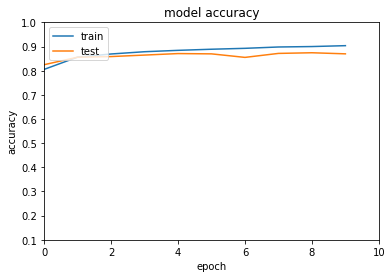

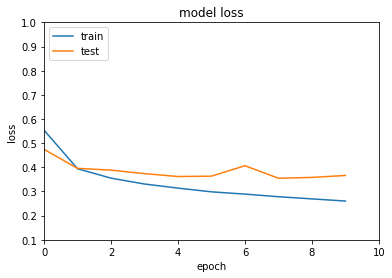

In [92]:
plt.plot(history_5.history['acc'])
plt.plot(history_5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()

In [104]:
predictions_5 = model_5.predict(test_images)
y_pred_5 = model_5.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
    	print('%d(expected %d)'% (np.argmax(predictions_5[i]) , test_labels[i]))

9(expected 9)
2(expected 2)
1(expected 1)
1(expected 1)
6(expected 6)
1(expected 1)
4(expected 4)
6(expected 6)
5(expected 5)
7(expected 7)


In [94]:
#Confusion Matrix
con_mat_5 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_5, num_classes=None)
print('\n Confusion Matrix : \n\n',con_mat_5)
report_5 = classification_report(test_labels, y_pred_5)
print('\n Classification Report : \n\n',report_5)


 Confusion Matrix : 

 Tensor("confusion_matrix_8/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)

 Classification Report : 

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.84      0.69      0.76      1000
           3       0.87      0.88      0.88      1000
           4       0.68      0.90      0.77      1000
           5       0.97      0.94      0.96      1000
           6       0.70      0.65      0.67      1000
           7       0.96      0.92      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



NameError: name 'plot_image' is not defined

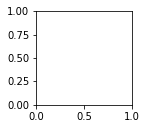

In [96]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_5[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_5[i], test_labels)
plt.tight_layout()
plt.show()

In [97]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = train_images[5000:], train_images[:5000] #images
(y_train, y_valid) = train_labels[5000:], train_labels[:5000] #labels


# Print training set shape
print("Training shape:", x_train.shape)#, "y_train shape:", y_train.shape)
print("Validation shape:", x_valid.shape)
print("Test shape:", test_images.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
#print(x_test.shape[0], 'test set')

Training shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)
55000 train set
5000 validation set


In [98]:
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_32 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 81,620
Trainable params: 81,620
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [100]:
history_6 = model_6.fit(x_train,
         y_train,
         batch_size=100,
         epochs=20,
         validation_data=(x_valid, y_valid),
         verbose=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 71us/sample - loss: 0.6715 - acc: 0.7762 - val_loss: 0.4252 - val_acc: 0.8560
Epoch 2/20
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4173 - acc: 0.8512 - val_loss: 0.4113 - val_acc: 0.8506
Epoch 3/20
55000/55000 [==============================] - 3s 57us/sample - loss: 0.3637 - acc: 0.8687 - val_loss: 0.3562 - val_acc: 0.8768
Epoch 4/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.3361 - acc: 0.8786 - val_loss: 0.3473 - val_acc: 0.8770
Epoch 5/20
55000/55000 [==============================] - 3s 57us/sample - loss: 0.3169 - acc: 0.8845 - val_loss: 0.3495 - val_acc: 0.8668
Epoch 6/20
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3014 - acc: 0.8903 - val_loss: 0.3597 - val_acc: 0.8698
Epoch 7/20
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2871 - acc: 0.8955 - val_loss: 0.3

In [101]:
train_loss, train_acc = model_6.evaluate(x_train,  y_train, verbose = 2)
print('\nTraining accuracy: %.2f\n ' %(train_acc*100))

test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy: %.2f\n' %(test_acc*100))

vald_loss,vald_acc = model_6.evaluate(x_valid, y_valid, verbose = 2)
print('\n Validation accuracy: %.2f' %(vald_acc*100))



55000/55000 - 4s - loss: 0.1916 - acc: 0.9303

Training accuracy: 93.03
 
10000/10000 - 1s - loss: 0.3520 - acc: 0.8828

Test accuracy: 88.28

5000/5000 - 0s - loss: 0.3211 - acc: 0.8908

 Validation accuracy: 89.08


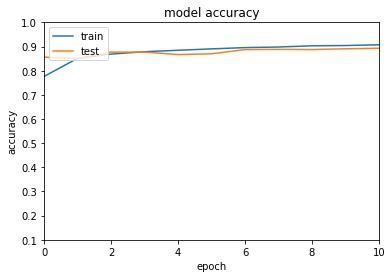

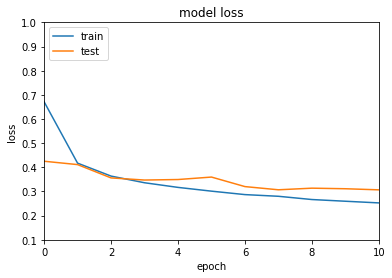

In [102]:
plt.plot(history_6.history['acc'])
plt.plot(history_6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()

In [ ]:
print(history_6.history.keys())

In [107]:
predictions_6 = model_6.predict(test_images)
y_pred_6 = model_6.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
    	print('%d(expected %d)'% (np.argmax(predictions_6[i]) , test_labels[i]))

9(expected 9)
2(expected 2)
1(expected 1)
1(expected 1)
0(expected 6)
1(expected 1)
4(expected 4)
6(expected 6)
5(expected 5)
7(expected 7)


In [108]:
con_mat_6 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_6, num_classes=None)
print('\n Confusion Matrix : \n\n',con_mat_6)
report_6 = classification_report(test_labels, y_pred_6)
print('\n Classification Report : \n\n',report_6)


 Confusion Matrix : 

 Tensor("confusion_matrix_9/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)

 Classification Report : 

               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.85      0.74      0.79      1000
           3       0.90      0.88      0.89      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.97      0.97      1000
           6       0.68      0.71      0.70      1000
           7       0.96      0.95      0.96      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



NameError: name 'plot_image' is not defined

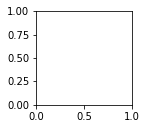

In [109]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [110]:
model_7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_7.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_36 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 81,620
Trainable params: 81,620
Non-trainable params: 0
_________________________________________________________________


In [111]:
#Set Train size to 40000
(x_train_1) = train_images[:40000] #images
(y_train_1) = train_labels[:40000] #labels

# Print training set shape
print("Training shape:", x_train_1.shape)#, "y_train shape:", y_train.shape)
print("Test shape:", test_images.shape)


Training shape: (40000, 28, 28)
Test shape: (10000, 28, 28)


In [112]:
model_7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
history_7 = model_7.fit(x_train_1, y_train_1, validation_data=(test_images, test_labels),epochs=10, verbose =0)

In [ ]:
train_loss, train_acc = model_7.evaluate(x_train,  y_train, verbose = 2)
print('\nTraining accuracy: %.2f\n ' %(train_acc*100))

test_loss, test_acc = model_7.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy: %.2f\n' %(test_acc*100))


In [ ]:
plt.plot(history_7.history['acc'])
plt.plot(history_7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()
# summarize history for loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()

In [ ]:
y_pred_7 = model_7.predict_classes(test_images)
con_mat_7 = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_7, num_classes=None)
print('\n Confusion Matrix : \n\n',con_mat_7)
report_7 = classification_report(test_labels, y_pred_7)
print('\n Classification Report : \n\n',report_7)

#### Build the model

In [ ]:
# Hyper-parameters
#epochs = 10             # Total number of training epochs
#batch_size = 100        # Training batch size
#display_freq = 100      # Frequency of displaying the training results
#learning_rate = 0.001   # The optimization initial learning rate

In [ ]:
model_8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_8.summary()

#### Compile the model

In [ ]:
model_8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train the model

In [ ]:
history = model_8.fit(train_images, train_labels, validation_data=(test_images, test_labels),epochs=20, verbose =0)

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose = 2)
#print('\n............................')
print('\nTraining accuracy: %.2f ' %(train_acc*100))

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy: %.2f' %(test_acc*100))

In [ ]:
print(history.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,10,0.10,1.00])
plt.show()

#### Make Predictions

In [ ]:
predictions = model_8.predict(test_images)

In [ ]:
predictions[4]

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[6])

In [ ]:
test_labels[6]

#### Performance Matrix : Confusion Matrix

In [ ]:
y_pred = model_8.predict_classes(test_images)
# summarize the first 10 cases
for i in range(10):
    	print('%d(expected %d)'% (np.argmax(predictions[i]) , test_labels[i]))
            
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred, num_classes=None)
print('\n Confusion Matrix : \n\n',con_mat)
report = classification_report(test_labels, y_pred)
print('\n Classification Report : \n\n',report)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[12]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions_single = model_8.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)